In [132]:
###########################################################
# Programa: Circuitos_2_lab_2_defasador
# Data criação: 20/03/2021; Data ultima comp: 28/03/2021 
# Autor: Fernando Cardoso ; Versão 1.0
# Descrição: O programa deve calcular as respostas de 
#            um circuito defasador
# Modificações: 
###########################################################
################ Declaração das biblioteca#################
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import math as mt
from datetime import datetime

In [133]:
################ Declaração das definições#################
R=1000                                   #definir o valor da resistencia em ohms                                    #definir o valor da indutância em H
R1=[10,100,1000,10000,100000]
C=0.1*10**(-6)                           #definir o valor da capacitancia em F
A=6.0                                    #definir o valor da amplitude em V
numero=5                                 #nuemro de frequencias 
f=1000.0
lista=[0.0]*numero                       #arrys de zeros
V_0=np.array(lista)                      #tensao saida
fase_0=np.array(lista)                   #fase da saida
w0=np.array(lista)
theta=np.array(lista)

In [134]:
############ Calculo dos parametros naturais #############
for i in range(0,numero):
    w0[i]=1/(R1[i]*C)

w=2*np.pi*f
w0

array([1.e+06, 1.e+05, 1.e+04, 1.e+03, 1.e+02])

In [135]:
def fase(win):
    return -round(2*mt.atan(w/win)*360/(2*np.pi),3)

In [136]:
################## Calculo das amplitudes ###################
for i in range(0,numero):
    V_0[i]=round(A/2,2)
    fase_0[i]=fase(w0[i])
    theta[i]=fase_0[i]*2*np.pi/360
fase_0

array([  -0.72 ,   -7.191,  -64.284, -161.914, -178.176])

In [137]:
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d_%m_%Y_%H_%M_%S%MS")

In [188]:
df=pd.DataFrame(list(zip(R1,V_0,fase_0)),
                columns=['R1\u03A9','V_0(V)','fase_0'])
df.style.hide_index()
df
df.to_csv ('d:\defasador_'+dt_string+'.csv', index = False, header=True,sep ='\t')
df

,R1Ω,V_0(V),fase_0
0,10,3.0,-0.720
1,100,3.0,-7.191
2,1000,3.0,-64.284
3,10000,3.0,-161.914
4,100000,3.0,-178.176


In [189]:
r = np.arange(10, 1000000, 100)
size=len(r)
size
theta_plot=np.array([0.0]*size)
V_0_plot=np.array([0.0]*size)
wplot=np.array([0.0]*size)
for i in range(0,size):
    wplot[i]=1/(C*r[i])
    theta_plot[i]=fase(wplot[i])*np.pi/180.0
    V_0_plot[i]=A/2

array([6.28318531e-03, 6.91150384e-02, 1.31946891e-01, ...,
       6.28136318e+02, 6.28199150e+02, 6.28261982e+02])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


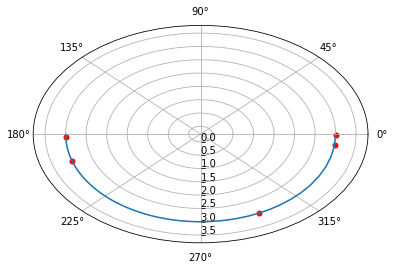

In [187]:

ax2 = plt.subplot(111, projection='polar')
ax2.plot(theta_plot, V_0_plot,marker='None' )
ax2.set_rmax(3.5)
plt.twinx()
ax = plt.subplot(111, projection='polar')
ax.scatter(theta, V_0,marker="." ,color='red', s=100 )
ax.set_rmax(3.5)
ax.set_rlabel_position(-90)
plt.show()